In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('spam_new.csv')

In [3]:
df.sample(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
558,ham,Hi Princess! Thank you for the pics. You are v...,NaN,NaN,NaN
823,spam,25p 4 alfie Moon's Children in need song on ur...,NaN,NaN,NaN
3479,ham,What was she looking for?,NaN,NaN,NaN
3485,ham,"Yeah, probably earlier than that",NaN,NaN,NaN
4795,spam,URGENT This is our 2nd attempt to contact U. Y...,NaN,NaN,NaN
3913,ham,Today is ACCEPT DAY..U Accept me as? Brother S...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

## step 1. DATA PREPROCESSING

### 1.1 Dropping unknown columns 

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.sample(9)

,v1,v2
2421,ham,Err... Cud do. I'm going to at 8pm. I haven't...
3898,ham,?? mean it's confirmed... I tot they juz say o...
4657,ham,This message is from a great Doctor in India:-...
5327,ham,Wishing you a wonderful week.
5278,spam,URGENT! Your Mobile number has been awarded wi...
5264,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."
1380,ham,i dnt wnt to tlk wid u
3663,ham,Huh? 6 also cannot? Then only how many mistakes?
4868,ham,1. Tension face 2. Smiling face 3. Waste face ...


### 1.2 Renaming column

In [8]:
df.rename(columns={'v1':'target','v2':'messages'},inplace=True)
df.sample(4)

,target,messages
2141,ham,Alright took the morphine. Back in yo.
1126,ham,Not tonight mate. Catching up on some sleep. T...
2656,ham,Feel like trying kadeem again? :V
1211,ham,Ok then i will come to ur home after half an hour


### 1.3 taget col --> id 
 - categorical labels into numeric values

In [9]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
encoder=LabelEncoder()

# Fit and transform the labels to numeric values
df['target']=encoder.fit_transform(df['target'])

df.head()
#ham-->0
#spam-->1

,target,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### 1.4 remove redundant data

In [10]:
df=df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()

np.int64(0)

##  2.EDA

### 2.1 How much is ham and spam .

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

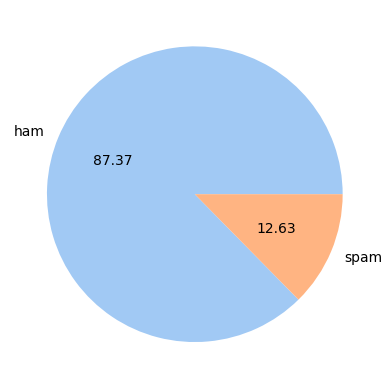

In [13]:
palette_color = sns.color_palette('pastel') 
plt.pie(df['target'].value_counts(), labels=['ham','spam'],colors=palette_color,autopct="%0.2f")
# displaying chart
plt.show() 

In [14]:
# data is imbalanced.

### 2.2 how much alphabets , words, sentences are used

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_char']=df['messages'].apply(len)
df.head()

,target,messages,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
try:
    df['messages'].apply(lambda x: nltk.word_tokenize(x))
except Exception as e:
    print(f"errors{e}")

In [18]:
print(nltk.data.path)mmm

['C:\\Users\\prate/nltk_data', 'C:\\Users\\prate\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'C:\\Users\\prate\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'C:\\Users\\prate\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\prate\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']
